In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("remote_work_employee_productivity.csv")

fixed_column_names = []
for column in df.columns:
    fixed_column_name = column.replace("\n", "")
    fixed_column_names.append(fixed_column_name)
df.columns = fixed_column_names

In [44]:
demographics_columns = [53, 54, 55, 56, 57, 58, 59]
demographics_column_names = [ df.columns[i] for i in demographics_columns ]

positive_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

negative_dict = {
    "Strongly disagree": 5,
    "Disagree": 4,
    "Neutral": 3,
    "Agree": 2,
    "Strongly Agree": 1
}
sentiment_dict = [positive_dict, negative_dict]


In [37]:
def replace_sentiment_with_numerics(dictionary, df):
    replacement_dict = { df.columns[i]: sentiment_dict[dictionary[i]] for i in range(len(dictionary)) }
    return df.replace(replacement_dict)

In [40]:
leadership_dict = [1, 1, 1, 0, 0, 0, 0, 0]
leadership_columns = [1, 2, 3, 4, 5, 6, 7, 8]
leadership_df = df.iloc[:, leadership_columns + demographics_columns]
leadership_df.head(10)

,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Disagree,Strongly disagree,Neutral,Agree,Strongly Agree,Agree,Agree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Disagree,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree,18-25,Single,No,North America,Male,others,IT
2,Strongly disagree,Neutral,Disagree,Agree,Strongly Agree,Agree,Strongly Agree,Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Disagree,Agree,Agree,Agree,Strongly Agree,Agree,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Neutral,Disagree,Strongly Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Agree,Neutral,Strongly Agree,Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Agree,Neutral,Agree,Agree,Agree,Neutral,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly disagree,Strongly disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Disagree,Disagree,Agree,Agree,Neutral,Agree,Strongly Agree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Disagree,Strongly disagree,Disagree,Strongly Agree,Disagree,Agree,Neutral,Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [41]:
leadership_df = replace_sentiment_with_numerics(leadership_dict, leadership_df)
leadership_df.head(10)

,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,4,5,3,4,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,4,4,3,3,3,4,4,4,18-25,Single,No,North America,Male,others,IT
2,5,3,4,4,5,4,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,2,2,4,5,4,3,4,26-35,Single,No,North America,Male,Asian,IT
4,2,2,1,4,5,3,2,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,3,4,3,5,4,26-35,Single,No,North America,Male,Caucasian,IT
6,2,3,2,4,4,3,3,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,4,2,4,3,4,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,4,5,4,5,2,4,3,4,36-45,Married,No,Europe,Male,Caucasian,IT


In [43]:
leadership_df["total"] = leadership_df.iloc[:, 0:len(leadership_dict)].sum(axis=1)
leadership_df["mean"] = leadership_df["total"] / len(leadership_dict)
leadership_df.head(10)


,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,4,5,3,4,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT,33,4.125
1,4,4,3,3,3,4,4,4,18-25,Single,No,North America,Male,others,IT,29,3.625
2,5,3,4,4,5,4,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT,34,4.250
3,4,2,2,4,5,4,3,4,26-35,Single,No,North America,Male,Asian,IT,28,3.500
4,2,2,1,4,5,3,2,5,18-25,Single,No,North America,Male,Caucasian,marketing,24,3.000
5,5,5,5,3,4,3,5,4,26-35,Single,No,North America,Male,Caucasian,IT,34,4.250
6,2,3,2,4,4,3,3,4,26-35,Single,No,North America,Male,Asian,IT,25,3.125
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT,40,5.000
8,4,4,2,4,3,4,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,30,3.750
9,4,5,4,5,2,4,3,4,36-45,Married,No,Europe,Male,Caucasian,IT,31,3.875


In [58]:
group_df = leadership_df[[demographics_column_names[0], "mean"]].groupby(demographics_column_names[0]).mean()
group_df.head(10)

,mean
What age group do you belong to?,
18-25,3.317308
26-35,3.826923
36-45,3.705357
46-55,2.750000
56+,4.125000
others,3.500000


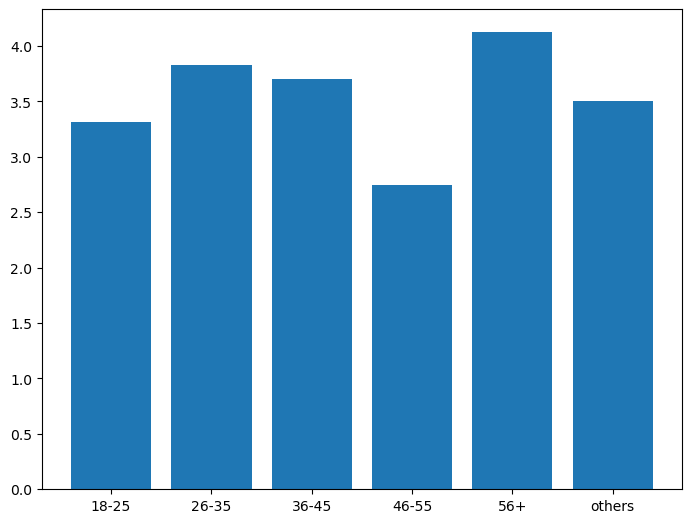

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = group_df.index
y = group_df["mean"]
ax.bar(x, y)
plt.show()